# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
#Downloading the Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdismielhossenabir/sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis


In [ ]:
import pandas as pd
sample = pd.read_csv('/kaggle/input/sentiment-analysis/sentiment_analysis.csv')
sample.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [ ]:
sample.sentiment.value_counts(normalize=True)

,proportion
sentiment,
neutral,0.398798
positive,0.332665
negative,0.268537


In [ ]:
sample['Platform'] = sample['Platform'].str.strip()
sample.Platform.value_counts()

,count
Platform,
Instagram,171
Facebook,169
Twitter,159


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
sample['clean_text'] = sample['text'].apply(lambda x: x.lower())
print("\nData Frame after converting texts to lowercase:")
sample.head()


Data Frame after converting texts to lowercase:


,Year,Month,Day,Time of Tweet,text,sentiment,Platform,clean_text
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,what a great day!!! looks like dream.
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,"i feel sorry, i miss you here in the sea beach"
2,2017,8,18,night,Don't angry me,negative,Facebook,don't angry me
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,we attend in the class just for listening teac...
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,"those who want to go, let them go"


In [ ]:
#Removing Stop words and Lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

sample['clean_text'] = sample['clean_text'].apply(clean_text)
sample.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,clean_text
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,great day look like dream
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,feel sorry miss sea beach
2,2017,8,18,night,Don't angry me,negative,Facebook,dont angry
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,attend class listening teacher reading slide n...
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,want go let go


In [ ]:
import matplotlib.pyplot as plt

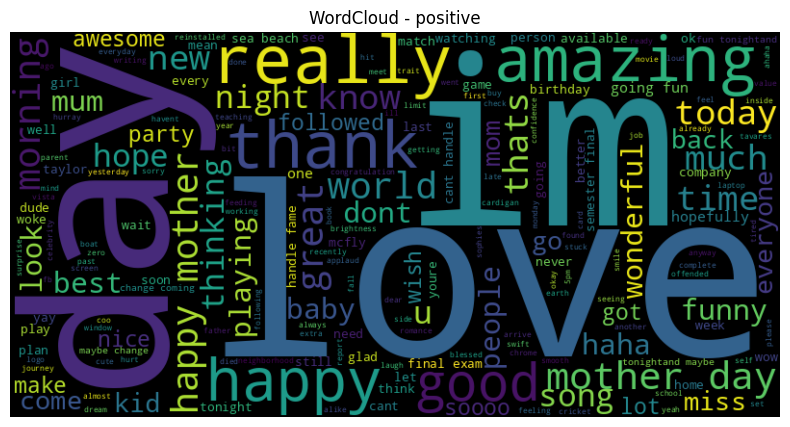

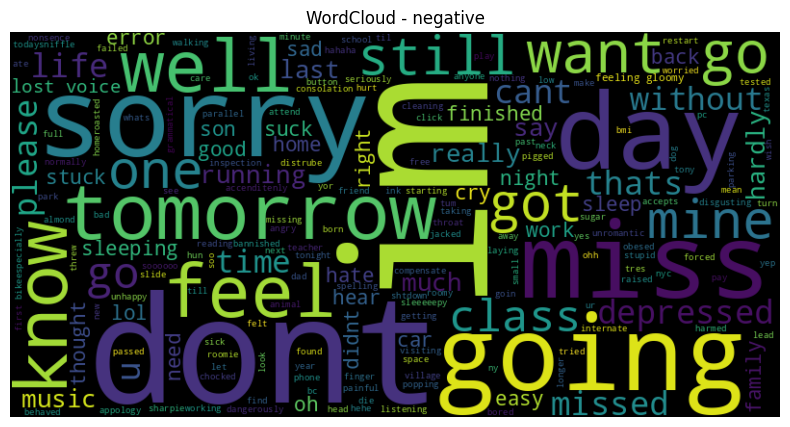

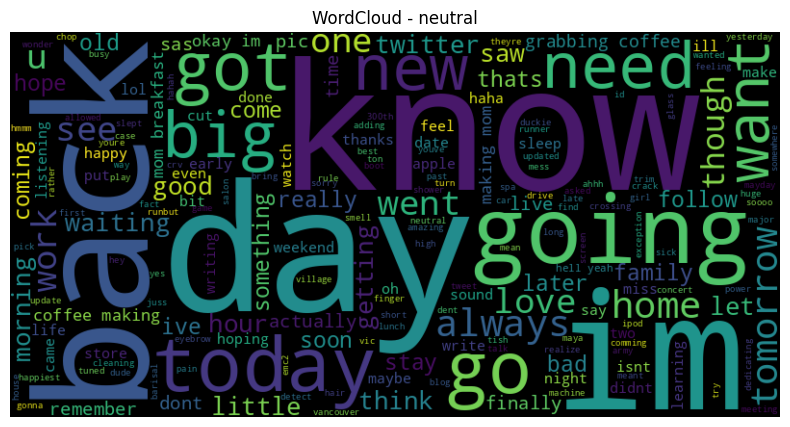

In [ ]:
# WordClouds
for sentiment in sample['sentiment'].unique():
    text = ' '.join(sample[sample['sentiment']==sentiment]['clean_text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {sentiment}")
    plt.show()


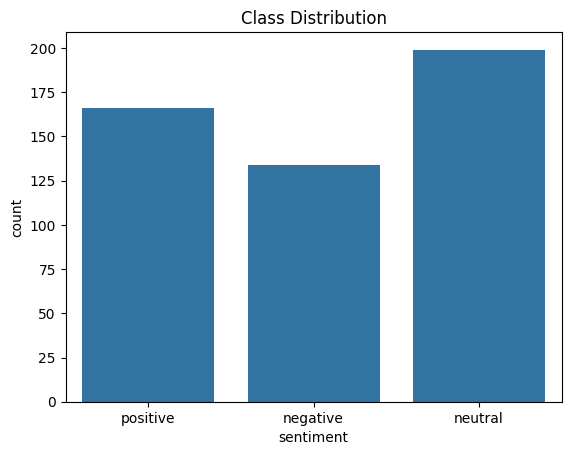

In [ ]:
#Visualization of Sentement class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=sample)
plt.title("Class Distribution")
plt.show()

<ipython-input-12-1e2b6d213b23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, x='count', y='ngram', palette='mako')


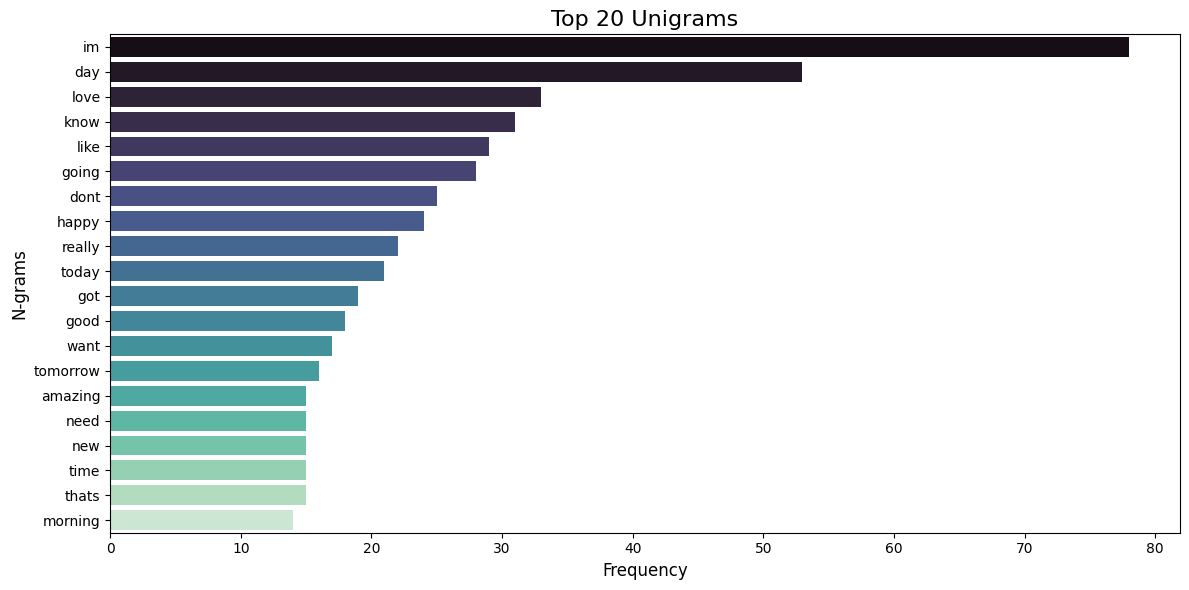

<ipython-input-12-1e2b6d213b23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, x='count', y='ngram', palette='mako')


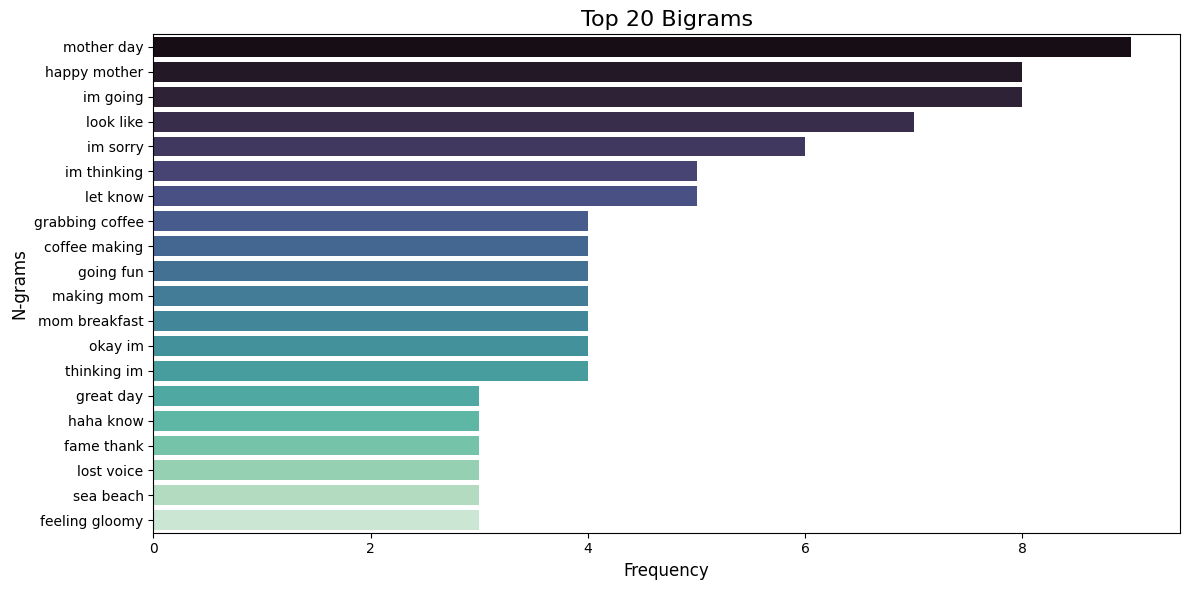

<ipython-input-12-1e2b6d213b23>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ngram_df, x='count', y='ngram', palette='mako')


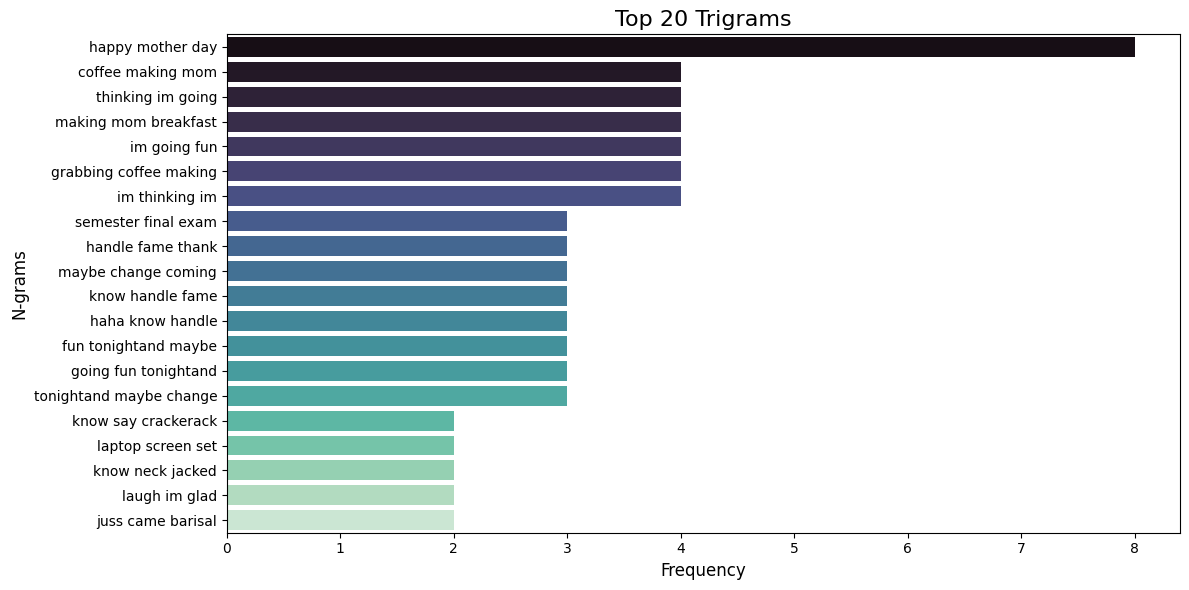

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Function to generate and plot top N n-grams
def plot_top_ngrams(text_data, ngram_range=(1, 1), top_n=20, title="Top N-grams"):
    # Vectorize
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(text_data)

    # Frequency computation
    ngram_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    ngram_df = pd.DataFrame(ngram_freq, columns=['ngram', 'count'])
    ngram_df = ngram_df.sort_values(by='count', ascending=False).head(top_n)

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(data=ngram_df, x='count', y='ngram', palette='mako')
    plt.title(title, fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("N-grams", fontsize=12)
    plt.tight_layout()
    plt.show()

# Run for unigrams
plot_top_ngrams(sample['clean_text'], ngram_range=(1, 1), top_n=20, title="Top 20 Unigrams")

# Run for bigrams
plot_top_ngrams(sample['clean_text'], ngram_range=(2, 2), top_n=20, title="Top 20 Bigrams")

# Run for trigrams
plot_top_ngrams(sample['clean_text'], ngram_range=(3, 3), top_n=20, title="Top 20 Trigrams")


Sentence Length Statistics:
count    499.000000
mean       6.454910
std        3.738365
min        0.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       18.000000
Name: sentence_length, dtype: float64


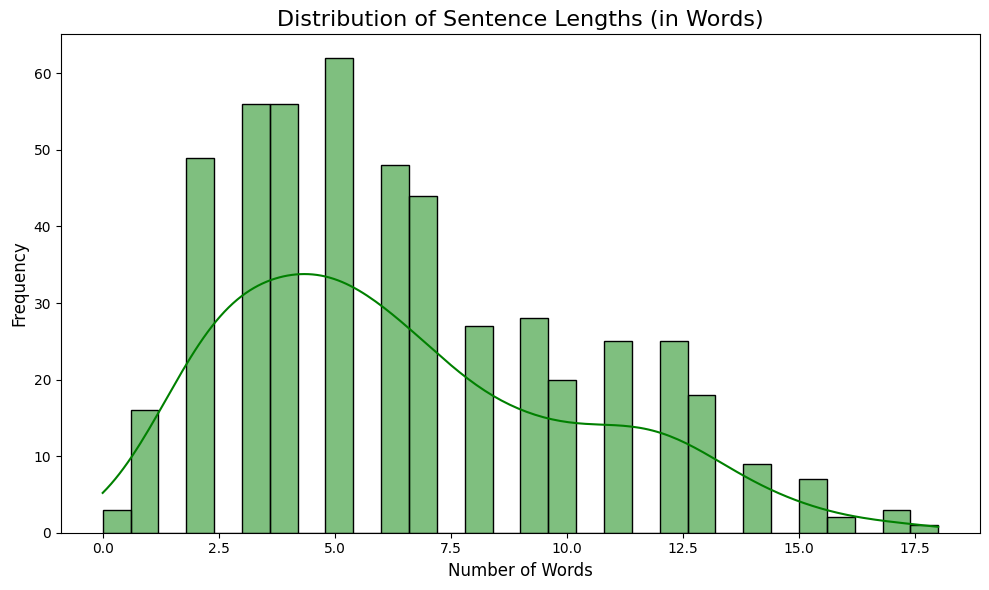

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentence length
sample['sentence_length'] = sample['clean_text'].apply(lambda x: len(x.split()))

print("Sentence Length Statistics:")
print(sample['sentence_length'].describe())

# Plot the distribution
plt.figure(figsize=(10,6))
sns.histplot(sample['sentence_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Lengths (in Words)', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


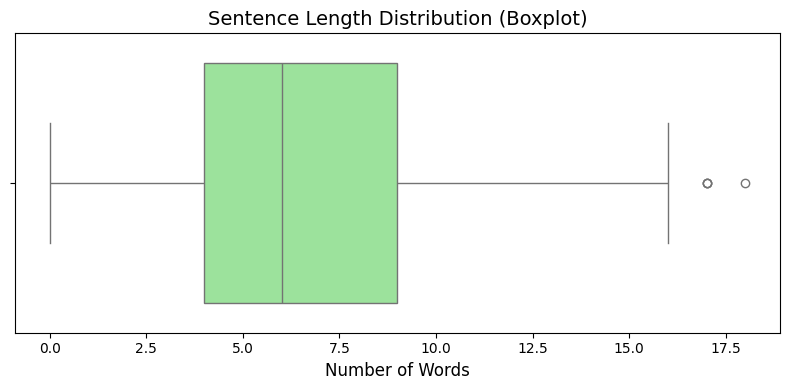

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=sample, x='sentence_length', color='lightgreen')
plt.title('Sentence Length Distribution (Boxplot)', fontsize=14)
plt.xlabel('Number of Words', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure your data has 'clean_text' and 'sentiment' columns
X = sample['clean_text']
y = sample['sentiment']  # Replace with actual column name if different


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(sample['sentiment'])  # y_encoded will now be numeric

# You can still access the original labels if needed
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Label mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


🔹 Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        36
           1       0.42      0.97      0.59        30
           2       0.87      0.59      0.70        34

    accuracy                           0.57       100
   macro avg       0.76      0.59      0.55       100
weighted avg       0.78      0.57      0.55       100



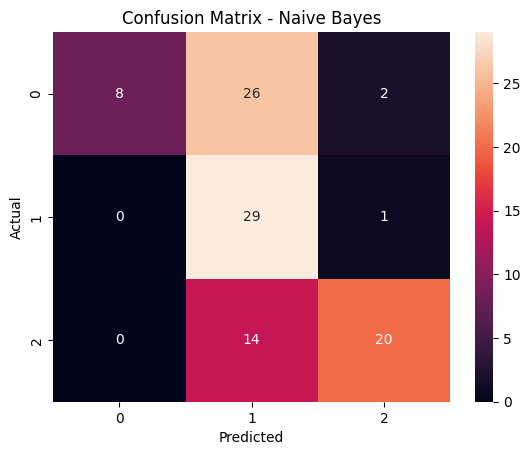

In [ ]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("🔹 Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


🔹 SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.47      0.60        36
           1       0.48      0.90      0.63        30
           2       0.87      0.59      0.70        34

    accuracy                           0.64       100
   macro avg       0.72      0.65      0.64       100
weighted avg       0.73      0.64      0.64       100



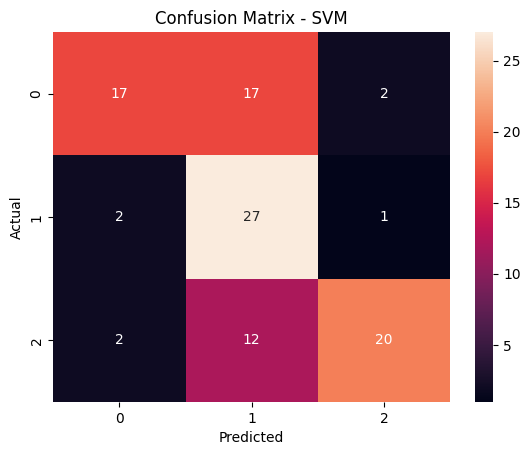

In [ ]:
# SVM Model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🔹 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        36
           1       0.50      0.77      0.61        30
           2       0.75      0.62      0.68        34

    accuracy                           0.60       100
   macro avg       0.62      0.61      0.60       100
weighted avg       0.63      0.60      0.60       100



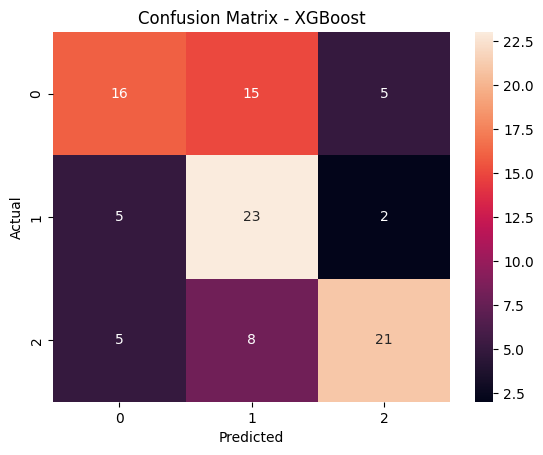

In [ ]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("🔹 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from transformers import pipeline
import pandas as pd

# Load the pretrained sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [ ]:
# Apply the sentiment pipeline to your text data
sample['bert_sentiment'] = sample['clean_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


<ipython-input-155-a9ff10658d46>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='bert_sentiment', data=sample, order=['Positive', 'Neutral', 'Negative'], palette='Set2')


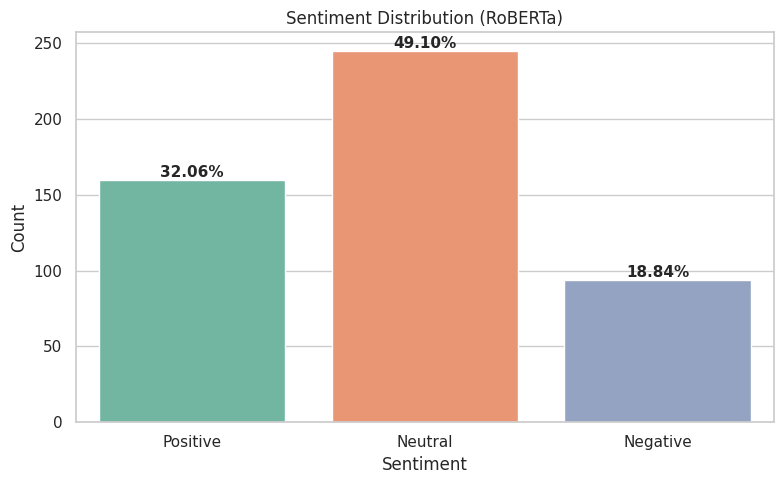

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Map BERT sentiment labels if not already mapped
label_map = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}
sample['bert_sentiment'] = sample['bert_sentiment'].map(label_map)

# Count the occurrences and calculate percentages
sentiment_counts = sample['bert_sentiment'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='bert_sentiment', data=sample, order=['Positive', 'Neutral', 'Negative'], palette='Set2')

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    percent = f'{(height / len(sample) * 100):.2f}%'
    ax.annotate(percent, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Sentiment Distribution (RoBERTa)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**SUMMARY**: I have extracted the data from the kaggle website mdismielhossenabir/sentiment-analysis. Performed Data analysis
Generated the word cloud for the clean text and visualized the class distribution in the data. vectorized the data and generated Unigrams, bigrams and trigrams and then calculated the sentence length and visualized them.
Performed sentiment analysis for three traditional classifiers naive bayes, support vector machine, XG boost.
Based on the classification reports and confusion matrices provided for Naive Bayes, SVM (LinearSVC), and XGBoost we observed that SVM performed best in terms of overall accuracy 64% and Naive Bayes had the lowest accuracy at 57%.

**Observations by class:**
Class 0:

Naive Bayes had extremely high precision (1.00) but very poor recall (0.22), meaning it predicted class 0 very selectively.

SVM and XGBoost were more balanced, but recall was still modest (~0.44–0.47).

Class 1:

All models had high recall, especially Naive Bayes (0.97), showing it rarely missed class 1.

Precision was low across the board, indicating many false positives.

Class 2:

SVM performed the best in precision and F1, followed closely by XGBoost.

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving stsa-test.txt to stsa-test (1).txt
Saving stsa-train.txt to stsa-train (1).txt


In [ ]:
# Performing EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load train and test files
def load_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels = [int(line[0]) for line in lines]
    texts = [line[2:].strip() for line in lines]
    return pd.DataFrame({'label': labels, 'text': texts})

train_df = load_file('/content/stsa-test.txt')
test_df = load_file('/content/stsa-train.txt')


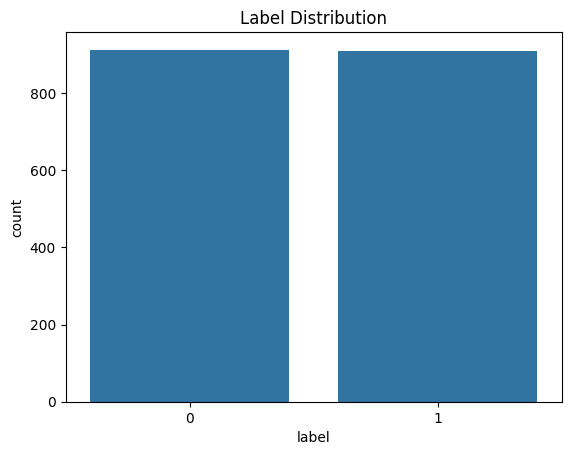

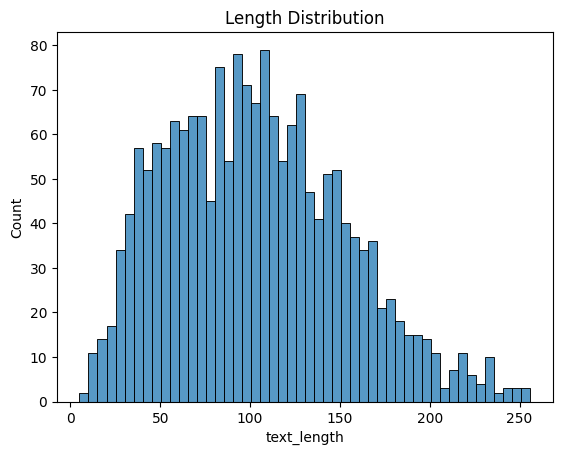

In [ ]:
# Label distribution
sns.countplot(x='label', data=train_df)
plt.title('Label Distribution')
plt.show()

# Review length
train_df['text_length'] = train_df['text'].apply(len)
sns.histplot(train_df['text_length'], bins=50)
plt.title('Length Distribution')
plt.show()



In [ ]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

Train shape: (1821, 3)
Test shape: (6920, 2)
label
0    912
1    909
Name: count, dtype: int64
label
1    3610
0    3310
Name: count, dtype: int64


In [ ]:
#Data Loading and Preprocessing
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
#load data
def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    train_data[['sentiment', 'reviews']] = train_data['reviews'].str.split(" ", n=1, expand=True)
    test_data = pd.read_csv(test_file, sep='delimiter=', header=None, names=['reviews'], engine='python')
    test_data[['sentiment', 'reviews']] = test_data['reviews'].str.split(" ", n=1, expand=True)
    return train_data, test_data

In [ ]:
#cleaning text
def clean_text(review, stopword):
    wl = WordNetLemmatizer()
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    tokens = re.split('\W+', review)
    review = [wl.lemmatize(word) for word in tokens if word not in stopword]
    return ' '.join(review)

In [ ]:
#preprocess data
def preprocess_data(train_data, test_data):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stopword = stopwords.words('english')
    train_data['clean_reviews'] = train_data['reviews'].apply(clean_text, args=(stopword,))
    test_data['clean_reviews'] = test_data['reviews'].apply(clean_text, args=(stopword,))
    label_encoder = LabelEncoder()
    train_data['sentiment'] = label_encoder.fit_transform(train_data['sentiment'])
    test_data['sentiment'] = label_encoder.transform(test_data['sentiment'])
    return train_data, test_data

In [ ]:
#tfidf_vectorization
def tfidf_vectorization(train_data, test_data):
  tfidf_vect = TfidfVectorizer()
  X_tfidf = tfidf_vect.fit_transform(train_data['clean_reviews'])
  X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
  X_test_tfidf = tfidf_vect.transform(test_data['clean_reviews'])
  return X_tfidf_df, X_test_tfidf

In [ ]:
#evaluate all the models
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=10):
    print("Model: ", type(model).__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Accuracy: {:.2f}%'.format(accuracy))
    print(classification_report(y_test, y_pred))

    scores = cross_val_score(model, X_test, y_test, cv=cv)
    print("Cross-Validation Mean Score: {:.2f}%".format(scores.mean() * 100))
    print("\n")

In [ ]:
if __name__ == "__main__":
    train_file = 'stsa-train.txt'
    test_file = 'stsa-test.txt'

    # Load and preprocess the dataset
    train_data, test_data = load_data(train_file, test_file)
    train_data, test_data = preprocess_data(train_data, test_data)

    # TF-IDF Vectorization
    X_tfidf_df, X_test_tfidf = tfidf_vectorization(train_data, test_data)

    # Selected classifiers
    classifiers = [
        LinearSVC(),                                        # Support Vector Machine
        KNeighborsClassifier(n_neighbors=5, n_jobs=-1),     # K-Nearest Neighbors
        DecisionTreeClassifier(),                           # Decision Tree
        RandomForestClassifier(),                           # Random Forest
        XGBClassifier()                                     # XGBoost
    ]

    # Evaluate each model
    for clf in classifiers:
        evaluate_model(clf, X_tfidf_df, train_data['sentiment'], X_test_tfidf, test_data['sentiment'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model:  LinearSVC


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 79.63%
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       912
           1       0.78      0.83      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821

Cross-Validation Mean Score: 70.95%


Model:  KNeighborsClassifier
Accuracy: 50.85%
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.85      0.02      0.04       909

    accuracy                           0.51      1821
   macro avg       0.68      0.51      0.35      1821
weighted avg       0.68      0.51      0.35      1821

Cross-Validation Mean Score: 52.71%


Model:  DecisionTreeClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 65.79%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       912
           1       0.67      0.62      0.65       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821

Cross-Validation Mean Score: 62.88%


Model:  RandomForestClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 74.46%
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       912
           1       0.76      0.72      0.74       909

    accuracy                           0.74      1821
   macro avg       0.75      0.74      0.74      1821
weighted avg       0.75      0.74      0.74      1821

Cross-Validation Mean Score: 66.06%


Model:  XGBClassifier
Accuracy: 49.86%
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       912
           1       0.17      0.00      0.00       909

    accuracy                           0.50      1821
   macro avg       0.33      0.50      0.33      1821
weighted avg       0.33      0.50      0.33      1821

Cross-Validation Mean Score: 65.96%





Confusion Matrix for LinearSVC


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


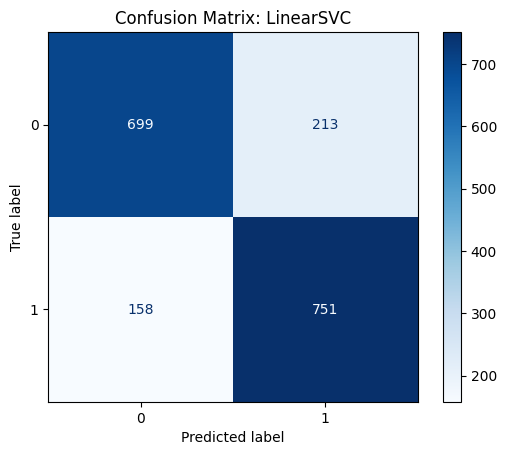


Confusion Matrix for KNeighborsClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


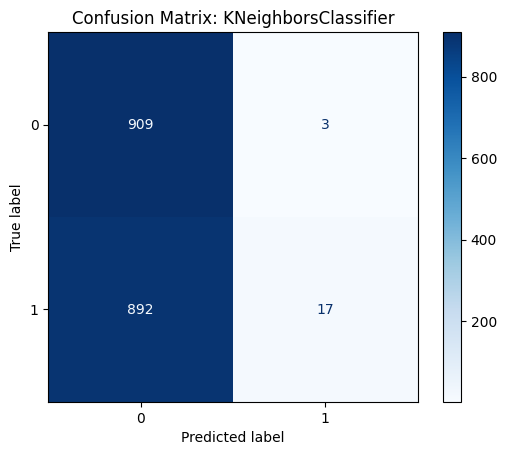


Confusion Matrix for DecisionTreeClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


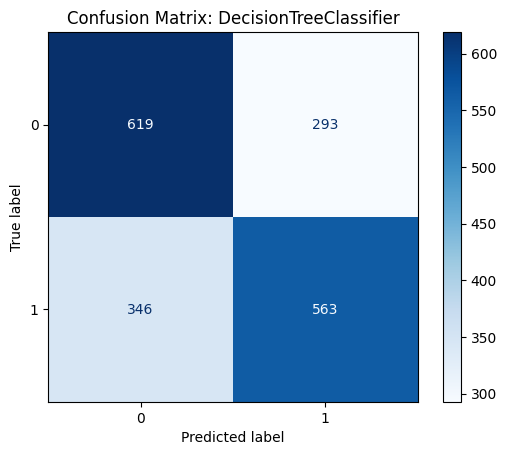


Confusion Matrix for RandomForestClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


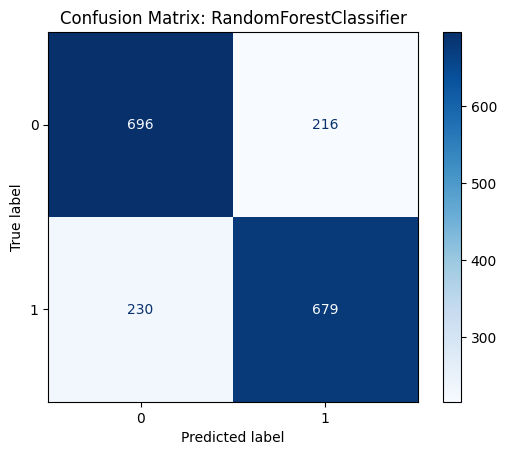


Confusion Matrix for XGBClassifier


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:17:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


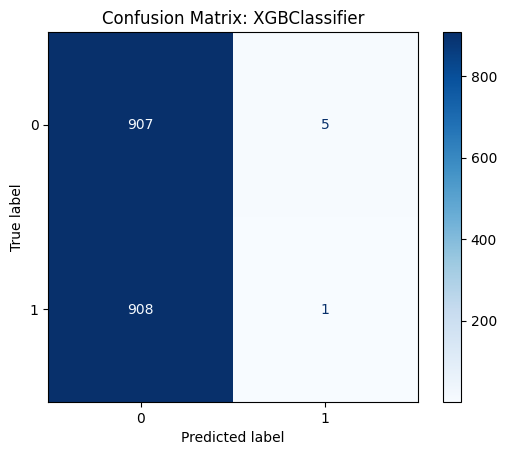

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Re-run the models and display confusion matrices
for clf in [
    LinearSVC(),
    KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss')
]:
    print(f"\nConfusion Matrix for {clf.__class__.__name__}")

    # Train on full training data
    clf.fit(X_tfidf_df, train_data['sentiment'])

    # Predict on test data
    y_pred = clf.predict(X_test_tfidf)

    # Compute confusion matrix
    cm = confusion_matrix(test_data['sentiment'], y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Display the confusion matrix
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {clf.__class__.__name__}')
    plt.show()


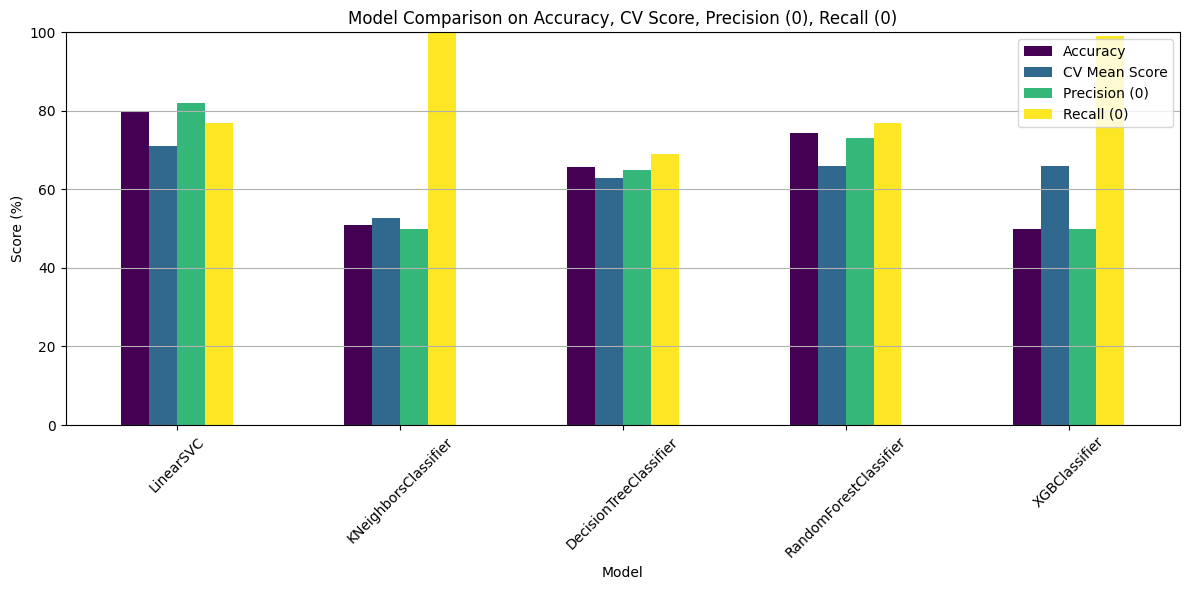

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Model': [
        'LinearSVC',
        'KNeighborsClassifier',
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'XGBClassifier'
    ],
    'Accuracy': [79.63, 50.85, 65.79, 74.46, 49.86],
    'CV Mean Score': [70.95, 52.71, 62.88, 66.06, 65.96],
    'Precision (0)': [0.82 * 100, 0.50 * 100, 0.65 * 100, 0.73 * 100, 0.50 * 100],
    'Recall (0)': [0.77 * 100, 1.00 * 100, 0.69 * 100, 0.77 * 100, 0.99 * 100]
}

df = pd.DataFrame(data)

# Set 'Model' as index
df_plot = df.set_index('Model')[['Accuracy', 'CV Mean Score', 'Precision (0)', 'Recall (0)']]

# Plotting
ax = df_plot.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Model Comparison on Accuracy, CV Score, Precision (0), Recall (0)')
plt.ylabel('Score (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# importing the libraries
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_review = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv')
df_review.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
print("Shape: {0}".format(df_review.shape))

Shape: (413840, 6)


In [ ]:
cluster_data_df = df_review.head(1000)
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0


In [ ]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # Define stop words

def preprocess(text):
    if not isinstance(text, str):  # Skip non-string values
        return ''
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

cluster_data_df.loc[:, 'clean'] = cluster_data_df['Reviews'].apply(preprocess)



<ipython-input-43-c7335de01725>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df.loc[:, 'clean'] = cluster_data_df['Reviews'].apply(preprocess)


In [ ]:
cluster_data_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,clean
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...
995,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,It's a decent for the price.. I've had this on...,0.0,decent price ive one 6 months cons 1 pretty fr...
996,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,3,Is good cell phone,0.0,good cell phone
997,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,"Amazing phone. Cables and case included, also ...",0.0,amazing phone cables case included also screen...
998,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,NaN,161.06,5,Excelent,0.0,excelent


In [ ]:
#kmeans clustering using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(cluster_data_df['clean'].values)
tfidf.shape

(1000, 3739)

In [ ]:
#kmeans
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters=10, random_state=42)
model_tf.fit(tfidf)

KMeans(n_clusters=10, random_state=42)

In [ ]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00103065, 0.00149628, ..., 0.00153372, 0.        ,
        0.00082559],
       ...,
       [0.00077418, 0.00031206, 0.00608542, ..., 0.00033283, 0.00028186,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
terms1 = tfidf_vect.get_feature_names_out()
terms1[1:10]

array(['10', '100', '100ok', '1010', '1080p', '1080pthis', '10k', '110',
       '1112016'], dtype=object)

In [ ]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')
silhouette_score_tf

0.0753912324599314

In [ ]:
df1 = cluster_data_df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.head(5)

<ipython-input-142-59e75e8b6025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tfidf Clus Label'] = model_tf.labels_


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,clean,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label,bert_cluster
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,7,4,0,4
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,2,4,0,4
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased,7,4,0,2
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love,3,4,0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...,7,0,0,0


In [ ]:
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

,Reviews
Tfidf Clus Label,
0,54
1,40
2,202
3,54
4,57
5,17
6,44
7,468
8,29


In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: bought
 phone
 gift
 return
 friend
 cellphone
 gave
 venezuela
 loves
 able
Cluster 1: work
 didnt
 phone
 back
 lousy
 found
 new
 waste
 speakers
 arrived
Cluster 2: phone
 sim
 card
 like
 screen
 use
 good
 would
 also
 work
Cluster 3: good
 phone
 price
 product
 buy
 mobile
 cell
 thanks
 waist
 recomend
Cluster 4: great
 phone
 works
 easy
 fast
 expected
 use
 good
 price
 luv
Cluster 5: working
 item
 stopped
 phone
 2g3g4g
 memory
 months
 usa
 erratically
 anymore
Cluster 6: excellent
 product
 recommend
 condition
 arrived
 thank
 seller
 much
 100
 phono
Cluster 7: phone
 excelent
 good
 ok
 bad
 well
 use
 bueno
 screen
 battery
Cluster 8: love
 best
 phone
 michelleheraud
 compact
 great
 buy
 problem
 service
 easy
Cluster 9: excelente
 telefono
 bueno
 muy
 producto
 excellently
 fast
 fcc
 favorite
 favor


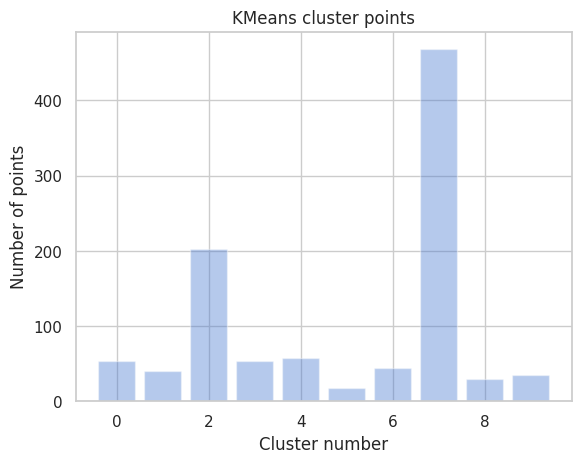

In [ ]:
#k-Means cluster
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['clean'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

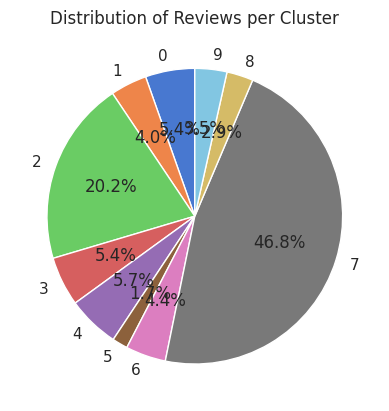

In [ ]:
# Group by the cluster label and count the reviews
cluster_counts = df1.groupby('Tfidf Clus Label')['clean'].count()

# Plot the pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Reviews per Cluster')
plt.show()


In [ ]:
print(X_pca.shape)  # Should be (number_of_samples, 2)
print(df1['Tfidf Clus Label'].shape)  # Should be (number_of_samples,)


(1000, 2)
(1000,)


(1000, 2)


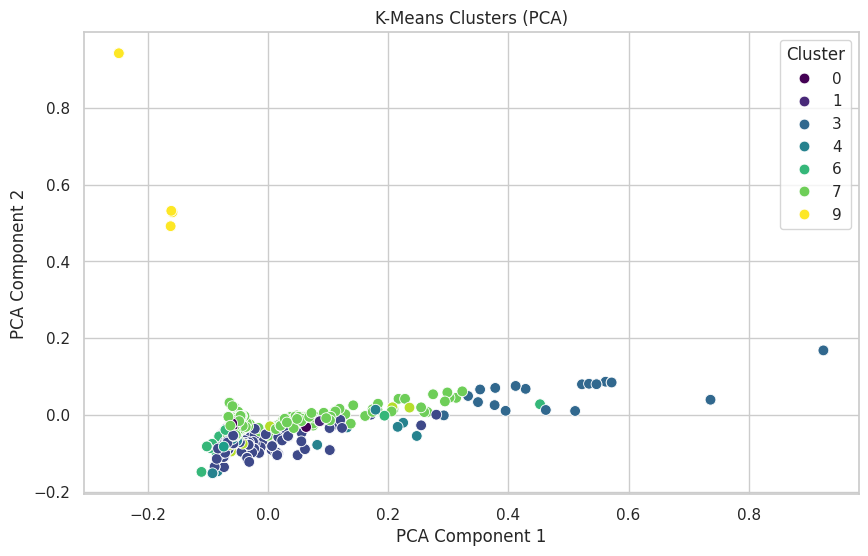

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(df1['clean'])

# Perform PCA on the TF-IDF data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())  # Transform the sparse matrix into a dense matrix for PCA

print(X_pca.shape)
#K-Means clusters after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df1['Tfidf Clus Label'], palette='viridis', s=60)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][6]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][4]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][4]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
Met expectations, easy to use, gave as gift veto elderly relative. She loves it.


Ad advertised as unlocked, had to pay $30..00 to have unlocked, phone number does not appear on phone.


Ad advertised as unlocked, had to pay $30..00 to have unlocked, phone number does not appear on phone.


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
My friend brought it to me at work after i ordered it on Amazon as we work together overseas and i live in Johannesburg. When i got home and tested the phone the microphone doesnt work. So you can hear but no one can hear you. Now im stuck with it because how would i get ut back to Texas? Very unhappy with the product


but did not work with Iwirless


but did not work with Iwirless


____________________________________

In [ ]:
#Kmeans other method
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(cluster_data_df['Reviews'].values)
bow.shape

(1000, 3455)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
# Assuming  that KMeans model and obtained cluster labels
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(bow)
labels = kmeans_model.labels_
# Calculate the silhouette score
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.41045214272644387


In [ ]:
cluster_data_df.loc[:, 'Bow Clus Label'] = kmeans_model.labels_
cluster_data_df.head(4)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,clean,Tfidf Clus Label,Bow Clus Label,AVG-W2V Clus Label,bert_cluster
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,7,4,0,4
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,2,4,0,4
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased,7,4,0,2
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love,3,4,0,0


In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
# Define the minimum number of points required to form a dense region
minPts = 2 * 100
# Lower bound function to find the 200th nearest neighbor distance
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
# Function to compute the 200th nearest neighbor distance
def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) ** 2)
        if (len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199]

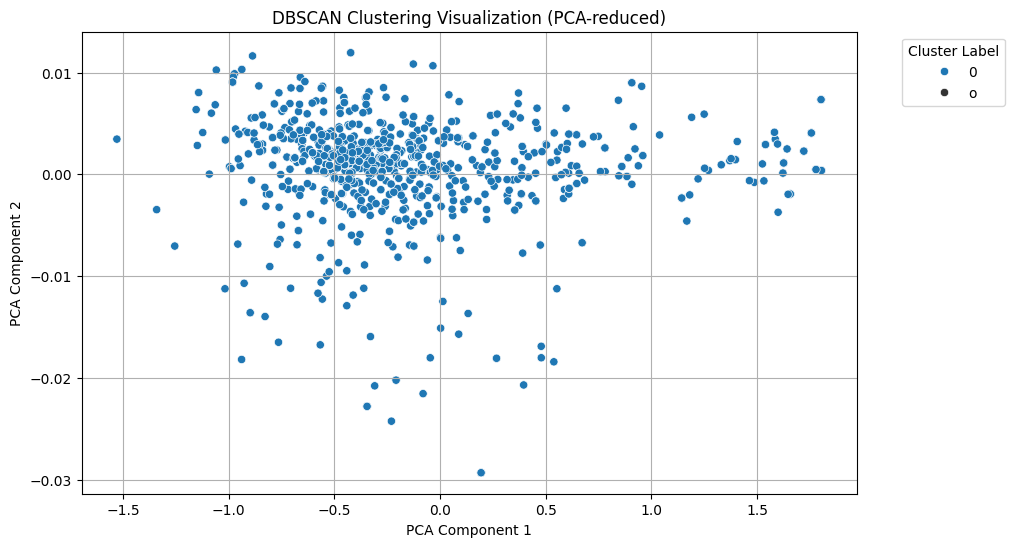

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Recreate the DBSCAN model with a new variable name to avoid confusion
dbscan_model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
dbscan_model.fit(sent_vectors)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sent_vectors)

# Get cluster labels
labels = dbscan_model.labels_

# Visualize
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", len(set(labels)))
sns.scatterplot(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    hue=labels,
    palette=palette,
    style=["o" if l != -1 else "X" for l in labels],
    legend="full"
)
plt.title("DBSCAN Clustering Visualization (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# training data by splitting the text into sentences
list_of_sent_train = list()
for i in cluster_data_df["clean"].values:
    list_of_sent_train.append(i.split())
# Train a Word2Vec model on the training data
import gensim
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)
# Convert sentences into vectors using the trained Word2Vec model
sent_vectors = []
count = 1
for sent in list_of_sent_train:
    sent_vec = np.zeros(100)
    cnt_words = 1
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)

In [ ]:
# Compute the 200th nearest neighbor distance for each point in the dataset
twohundrethneigh = []
for val in sent_vectors[:300]:
    twohundrethneigh.append(compute200thnearestneighbour(val, sent_vectors[:300]) )
twohundrethneigh.sort()
# Train the DBSCAN clustering model
model = DBSCAN(eps=5, min_samples=minPts, n_jobs=-1)
model.fit(sent_vectors)
# Assign cluster labels to the data points
cluster_data_df.loc[:, 'AVG-W2V Clus Label'] = model.labels_

<ipython-input-60-388f55db5634>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df.loc[:, 'AVG-W2V Clus Label'] = model.labels_


In [ ]:
from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between samples in the data
distances = pairwise_distances(sent_vectors)
# Sort the distances in ascending order
sorted_distances = np.sort(distances, axis=0)
# Get the 200th nearest neighbor distance for each point
twohundredth_nearest_distances = sorted_distances[:, 199]

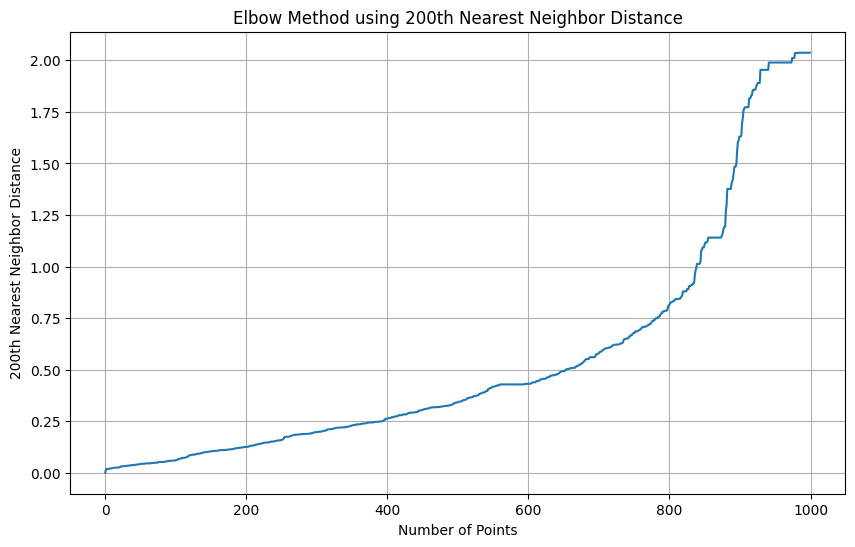

In [ ]:
# Plot the elbow method graph using the 200th nearest neighbor distances
plt.figure(figsize=(10, 6))
plt.plot(twohundredth_nearest_distances)
plt.title("Elbow Method using 200th Nearest Neighbor Distance")
plt.xlabel("Number of Points")
plt.ylabel("200th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

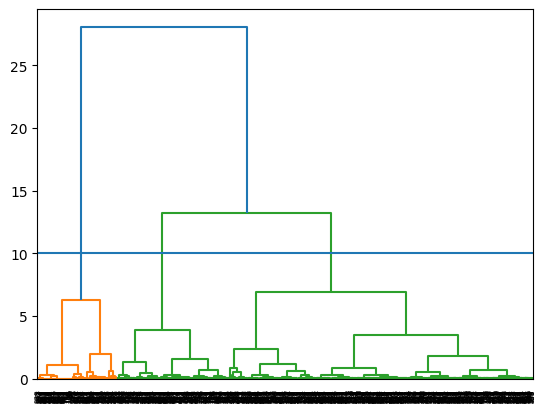

In [ ]:
#Hierarchial Clustering
import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method = 'ward'))
plt.axhline(y = 10)

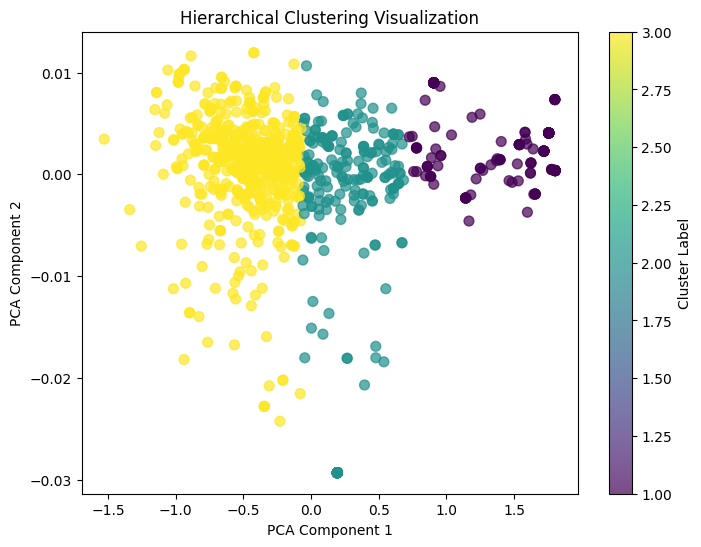

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sent_vectors)

# Step 2: Perform hierarchical clustering and get labels
max_d = 10  #
clusters = hierarchy.fcluster(hierarchy.linkage(sent_vectors, method='ward'), max_d, criterion='distance')

# Step 3: Plot the data points in 2D with color corresponding to cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


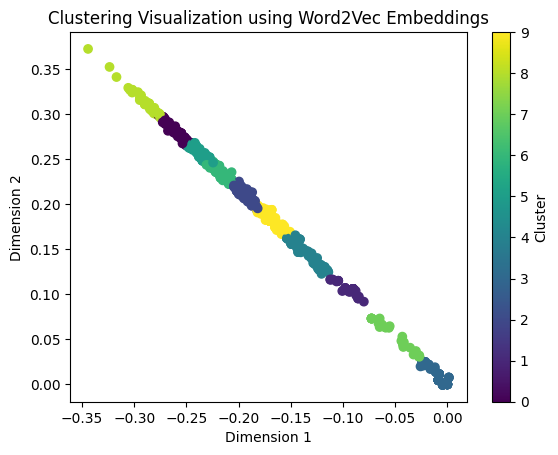

In [ ]:
#Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(sent_vectors)
clusters = kmeans.predict(sent_vectors)
# Visualize the clustering results
plt.scatter(sent_vectors[:, 0], sent_vectors[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering Visualization using Word2Vec Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer
import umap
from sklearn.cluster import KMeans

# Load the model and generate embeddings for the 'clean' column
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(cluster_data_df['clean'].tolist(), show_progress_bar=True)

# Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(embeddings)

# Apply K-Means clustering
kmeans_bert = KMeans(n_clusters=5, random_state=42)
cluster_data_df['bert_cluster'] = kmeans_bert.fit_predict(X_umap)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
<ipython-input-116-5a0ebc3b00a3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data_df['bert_cluster'] = kmeans_bert.fit_predict(X_umap)


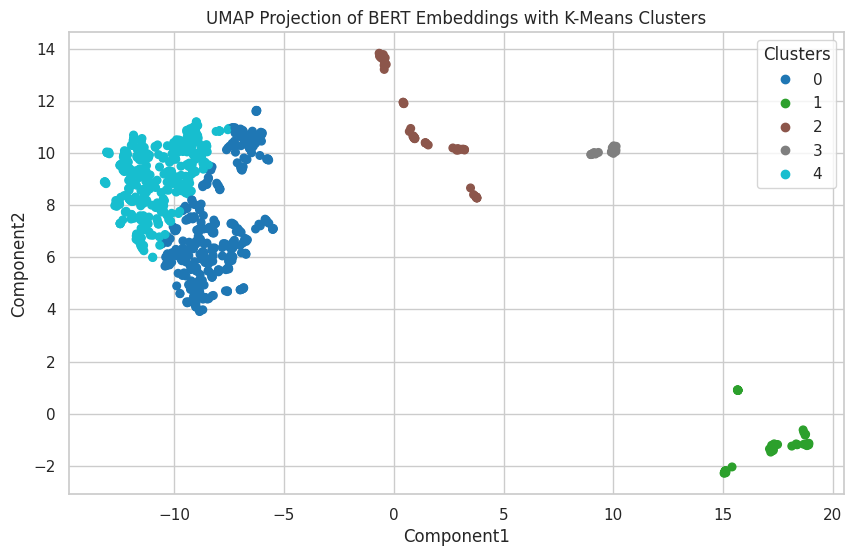

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid", palette="muted")

# Create a scatter plot of UMAP-reduced embeddings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                      c=cluster_data_df['bert_cluster'],
                      cmap='tab10', s=30)

# Add a legend for the clusters
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('UMAP Projection of BERT Embeddings with K-Means Clusters')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**
.K-means generally provided more balanced and well-separated clusters when the number of clusters was pre-defined. I have taken k values as 10 and most of the data is clustered in 7th cluster which is visualized.

DBSCAN code uses a method to calculate the distance to the 200th nearest neighbor for each point.

Hierarchical clustering showed a visual representation using dendrograms and it worked well. But it but lacked scalability and we were required to give the manual selection threshold.

Coming to UMAP bert embeddings with k means cluster performed well and provided good clustering results

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

